In [52]:
import torch
import  numpy as np
from PIL import Image, ImageDraw
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection 

model_id = "IDEA-Research/grounding-dino-base"
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

image_url = "D://Work//coding//vuzz//new//MIREA_7_semester_VT//rsppr//SAFE-MACS//data//cppe5//test//images//55_jpg.rf.8ee9e69620b191300f2a2db8cefc26af.jpg"
image = Image.open(image_url)

text = """
    full-body coverall. 
    transparent face shield. 
    glove. 
    protective glasses. 
    medical mask.
    """

# text = """
#     a full-body protective suit worn to prevent exposure to hazardous materials or infectious agents. 
#     a transparent shield that covers the face to protect against splashes or droplets. 
#     hand coverings used to prevent contamination or contact with hazardous substances. 
#     a protective eyewear designed to shield the eyes from harmful substances or particles. 
#     a protective face covering used to filter airborne particles or prevent the spread of infections.
#     """

inputs = processor(images=image, text=text, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.3,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
)
results

[{'scores': tensor([0.5348, 0.4894, 0.3945, 0.4449, 0.4048, 0.3273, 0.3033],
         device='cuda:0'),
  'labels': ['full - body coverall',
   'medical mask',
   'full - body coverall',
   'medical mask',
   'transparent face shield',
   'protective glasses',
   'glasses'],
  'boxes': tensor([[321.5387,  28.1713, 638.7859, 638.2057],
          [152.7551, 386.4891, 270.0914, 538.3010],
          [ 47.3629, 210.9576, 333.9363, 638.5789],
          [330.9888, 224.5091, 420.3788, 330.9394],
          [314.5414,  97.9392, 442.5122, 239.4151],
          [156.5481, 384.0061, 267.8486, 416.5596],
          [152.3583, 384.4641, 269.0566, 436.9394]], device='cuda:0')}]

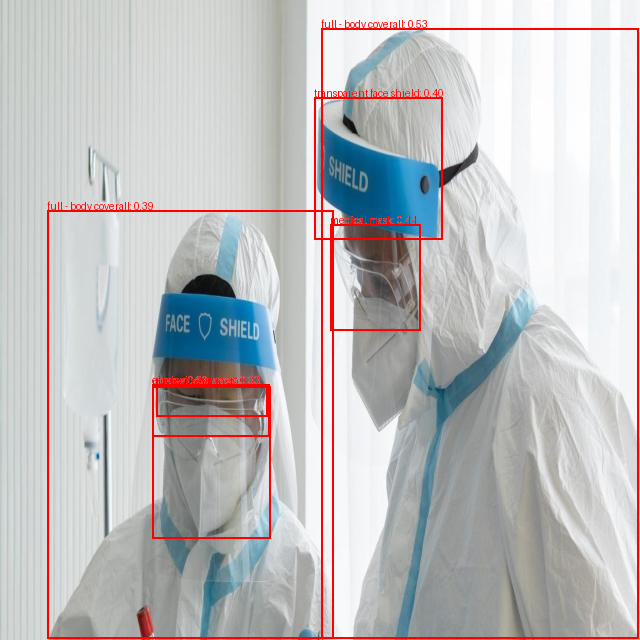

In [54]:
draw = ImageDraw.Draw(image)

for result in results:
    boxes = result['boxes']
    labels = result['labels']
    scores = result['scores']

    for box, label, score in zip(boxes, labels, scores):
        box = box.cpu().numpy().astype(int)
        
        draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline="red", width=2)
        
        text = f"{label}: {score.item():.2f}"
        draw.text((box[0], box[1] - 10), text, fill="red")

# image.save("output_image.jpg")
# image.show()
display(image)

TRAIN

In [ ]:
# from groundingdino.models import GroundingDINO

# # Load pre-trained model
# model = GroundingDINO.from_pretrained("path/to/pretrained/model")

# # Freeze all layers except the classifier
# for param in model.parameters():
#     param.requires_grad = False

# # Replace the classifier
# num_classes = len(your_custom_classes)
# model.classifier = nn.Linear(model.classifier.in_features, num_classes)

# # Unfreeze the classifier parameters
# for param in model.classifier.parameters():
#     param.requires_grad = True

# # Train the model
# # ... (setup your DataLoader, loss function, optimizer, etc.)
# # ... (training loop)